In [ ]:
!pip install datasets

In [ ]:
from datasets import load_dataset

ds = load_dataset("emotone-ar-cicling2017/emotone_ar")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
# عرض بعض العينات من البيانات
print(ds['train'][0])


{'tweet': 'الاوليمبياد الجايه هكون لسه ف الكليه ..', 'label': 0}


              label
count  10065.000000
mean       3.247193
std        2.328732
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max        7.000000
                                               tweet  label
0            الاوليمبياد الجايه هكون لسه ف الكليه ..      0
1  عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...      1
2                         كتنا نيله ف حظنا الهباب xD      3
3  جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...      2
4  الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...      0


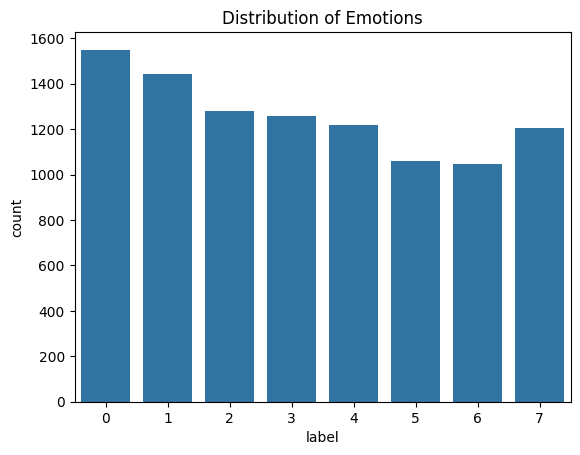

In [ ]:
import pandas as pd

# تحويل البيانات إلى DataFrame
df = pd.DataFrame(ds['train'])

# عرض الإحصائيات الأساسية
print(df.describe())

# عرض بعض السجلات
print(df.head())

# رسم توزيع الأعمدة (مثل التوزيع العاطفي)
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title('Distribution of Emotions')
plt.show()


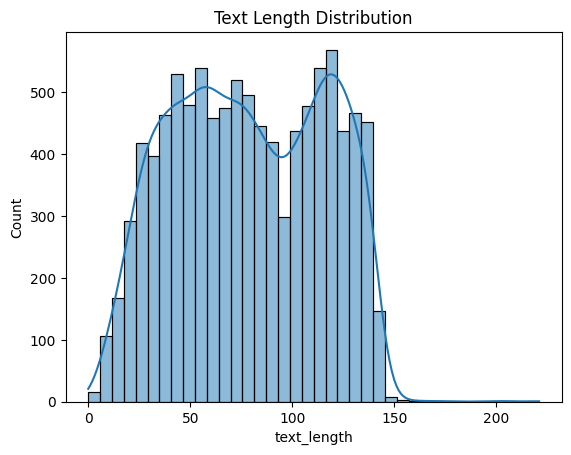

In [ ]:
# إضافة عمود طول النص
df['text_length'] = df['tweet'].apply(len)

# رسم توزيع طول النصوص
sns.histplot(df['text_length'], kde=True)
plt.title('Text Length Distribution')
plt.show()


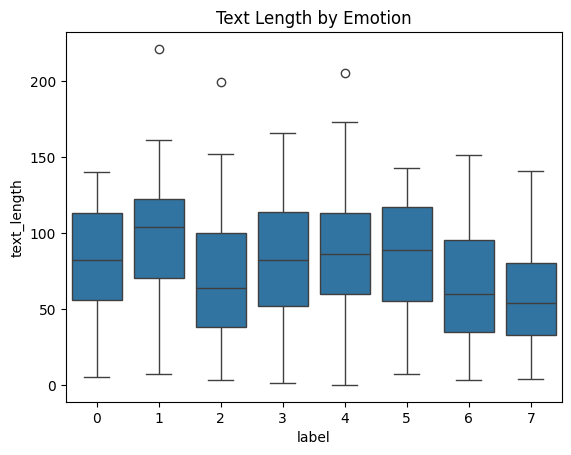

In [ ]:
# رسم طول النصوص حسب التصنيف العاطفي
sns.boxplot(x='label', y='text_length', data=df)
plt.title('Text Length by Emotion')
plt.show()


In [ ]:
# عدد الفئات الفريدة في العمود 'label'
unique_classes = df['label'].nunique()
print(f"عدد الفئات الفريدة: {unique_classes}")


عدد الفئات الفريدة: 8


In [ ]:
# عرض التوزيع لكل فئة عاطفية
class_distribution = df['label'].value_counts()
print("توزيع الفئات:")
print(class_distribution)


توزيع الفئات:
label
0    1550
1    1444
2    1281
3    1256
4    1220
7    1207
5    1062
6    1045
Name: count, dtype: int64


In [ ]:
# استخراج النصوص حسب الفئات العاطفية المختلفة
none_texts = df[df['label'] == 0]['tweet']
anger_texts = df[df['label'] == 1]['tweet']
joy_texts = df[df['label'] == 2]['tweet']
sadness_texts = df[df['label'] == 3]['tweet']
love_texts = df[df['label'] == 4]['tweet']
sympathy_texts = df[df['label'] == 5]['tweet']
surprise_texts = df[df['label'] == 6]['tweet']
fear_texts = df[df['label'] == 7]['tweet']

# عرض بعض النصوص لكل فئة
print("نصوص فئة None (0): \n", none_texts.head(), "\n")
print("نصوص فئة Anger (1): \n", anger_texts.head(), "\n")
print("نصوص فئة Joy (2): \n", joy_texts.head(), "\n")
print("نصوص فئة Sadness (3): \n", sadness_texts.head(), "\n")
print("نصوص فئة Love (4): \n", love_texts.head(), "\n")
print("نصوص فئة Sympathy (5): \n", sympathy_texts.head(), "\n")
print("نصوص فئة Surprise (6): \n", surprise_texts.head(), "\n")
print("نصوص فئة Fear (7): \n", fear_texts.head(), "\n")


نصوص فئة None (0): 
 0               الاوليمبياد الجايه هكون لسه ف الكليه ..
4     الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...
15    20 سنه وهيلعب الاوليمبياد مع نيجيريا مش زي ايف...
18    المفروض يلغوها من الاوليمبياد وندخل الاسكواش م...
24     بعثه مصر في الاوليمبياد رايحه تتفرج زيها زينا 😂😂
Name: tweet, dtype: object 

نصوص فئة Anger (1): 
 1     عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...
23    علي المواطن ان يخبط راسه في الحيط احتجاجاً ، و...
37    ايران تمول قناه الحره وبعدين معاك ي ايران تري ...
48    :  الصرخي يحطم كهنوتيه السيستاني السيستاني لم ...
49    : انتقاله عجيبه، عقيل الخزعلي من مذيع بقناه اف...
Name: tweet, dtype: object 

نصوص فئة Joy (2): 
 3     جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...
11    عالماشي | غدا.. لقاء نادر للنجمه ناديه لطفي عل...
13    عاجبني فشخ العرب الي داخلين تحت علم الاوليمبيا...
36    Minawya9 خلاص مهو دخل .. افكسو مالهاشتاج ده ون...
38                                       ده فيديو حياتي
Name: tweet, dtype: object 

نصوص فئة S

In [ ]:
emotion_mapping = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

In [ ]:
# استبدال الأرقام بأسماء المشاعر
df['emotion'] = df['label'].map(emotion_mapping)

# عرض توزيع المشاعر
emotion_distribution = df['emotion'].value_counts()
print("توزيع المشاعر:")
print(emotion_distribution)


توزيع المشاعر:
emotion
none        1550
anger       1444
joy         1281
sadness     1256
love        1220
fear        1207
sympathy    1062
surprise    1045
Name: count, dtype: int64


In [ ]:
# حساب متوسط طول النصوص لكل فئة
avg_text_length_per_class = df.groupby('emotion')['tweet'].apply(lambda x: x.str.len().mean())
print("متوسط طول النصوص لكل فئة:")
print(avg_text_length_per_class)


متوسط طول النصوص لكل فئة:
emotion
anger       94.931440
fear        60.086993
joy         68.800937
love        85.013115
none        83.899355
sadness     81.351911
surprise    66.035407
sympathy    85.339925
Name: tweet, dtype: float64


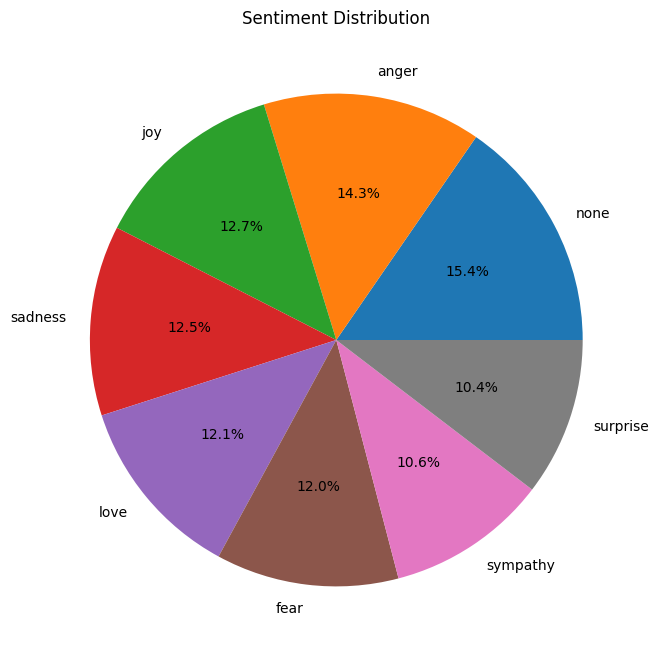

In [ ]:
plt.figure(figsize=(8, 8))
df['emotion'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.ylabel('')
plt.show()

In [ ]:
!pip install neattext # Install the neattext library
import neattext.functions as nfx

# Remove the user handles
df['Clean_Text'] = df['tweet'].apply(nfx.remove_userhandles)

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
pip install arabic-reshaper


In [ ]:
!pip install pyarabic
!pip install emoji # Install the 'emoji' module

In [ ]:
import nltk
nltk.download('stopwords')
import re
import numpy as np
import pandas as pd
import arabic_reshaper
import pyarabic.araby as ar  # Library for shaping Arabic text
from nltk.corpus import stopwords
from nltk.stem.isri import ISRIStemmer
from emoji import demojize


# Loading Arabic stopwords list from NLTK
stop_words = set(stopwords.words('arabic'))

# Function to clean the text
def data_cleaning(texts):
    texts = texts.astype(str)  # Convert any non-text data to string

    # Remove URLs
    texts = texts.str.replace(r'http\S+|www\S+|https?:\/\/.*[\r\n]*', '', regex=True)

    # Remove numbers
    texts = texts.str.replace(r'\d+', ' ', regex=True)

    # Remove tashkeel and tatweel
    texts = texts.apply(lambda x: ar.strip_tashkeel(ar.strip_tatweel(x)))

    # Replace symbols like "#", "@", and "_"
    texts = texts.str.replace(r'[#@_]', ' ', regex=True)

    # Remove repeated characters
    texts = texts.apply(lambda x: re.sub(r'(.)\1+', r'\1', x))

    # Replace some characters with more common ones
    texts = texts.str.replace('آ', 'ا').str.replace('إ', 'ا').str.replace('أ', 'ا')
    texts = texts.str.replace('ؤ', 'و').str.replace('ئ', 'ي')

    # Remove stopwords
    texts = texts.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

    # Remove punctuation marks
    texts = texts.str.replace(r'[^\w\s]', '', regex=True)

    # Convert emojis to text
    texts = texts.apply(demojize)

    return texts

# 🔹 Apply the function to your data
df['Clean_Text'] = data_cleaning(df['Clean_Text'])  # Replace 'Clean_Text' with the column containing your text data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df

,tweet,label,text_length,emotion,Clean_Text
0,الاوليمبياد الجايه هكون لسه ف الكليه ..,0,39,none,الاوليمبياد الجايه هكون لسه الكليه
1,عجز الموازنه وصل ل93.7 % من الناتج المحلي يعني...,1,100,anger,عجز الموازنه وصل الناتج المحلي يعني لسه اقل ...
2,كتنا نيله ف حظنا الهباب xD,3,26,sadness,كتنا نيله حظنا الهباب xD
3,جميعنا نريد تحقيق اهدافنا لكن تونس تالقت في حر...,2,59,joy,جميعنا نريد تحقيق اهدافنا تونس تالقت حراسه المرمي
4,الاوليمبياد نظامها مختلف .. ومواعيد المونديال ...,0,79,none,الاوليمبياد نظامها مختلف ومواعيد المونديال مك...
...,...,...,...,...,...
10060,2222: يلا يا جماعه حفله عمرو دياب خلصت نريح شو...,3,123,sadness,يلا جماعه حفله عمرو دياب خلصت نريح شويه ونبدا...
10061,Mohamed5: اييييه دااا 😲😲 اوزيييل❤,6,33,surprise,Mohamed ايه دا اوزيل
10062,عملتلها ريتويت بمناسبه ساره بتاعه الاوليمبياد 😃,0,47,none,عملتلها ريتويت بمناسبه ساره بتاعه الاوليمبياد
10063,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس,2,47,joy,وعليك قبلنا يانجم النجوم ياعندليب الحب والاحساس


In [ ]:
x = df['Clean_Text']
y = df['emotion']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from joblib import Parallel, delayed


In [ ]:
# تحويل الفئات النصية إلى أرقام
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# إنشاء النماذج داخل بايبلاين
models = {
    "Random Forest": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),

    "Logistic Regression": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('lr', LogisticRegression(max_iter=1000))
    ]),

    "SVM (Linear)": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('svc', SVC(kernel='linear', C=10))
    ]),

    "SVM (RBF)": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('svc', SVC(kernel='rbf', C=10))
    ]),

    "K-Nearest Neighbors (KNN)": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('knn', KNeighborsClassifier(n_neighbors=5))
    ]),

    "XGBoost Classifier": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
    ]),

    "Decision Tree Classifier": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('dt', DecisionTreeClassifier(random_state=42))
    ]),

    "Multinomial Naïve Bayes": Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('nb', MultinomialNB())
    ])
}

# تدريب وتقييم كل نموذج
for name, model in models.items():
    print(f"\n🔹 Training {name} model...")
    model.fit(x_train, y_train_encoded)  # تدريب النموذج

    y_pred = model.predict(x_test)  # التنبؤ
    acc = accuracy_score(y_test_encoded, y_pred)  # حساب الدقة

    print(f"✅ {name} Accuracy: {acc:.2f}")
    print("📊 Classification Report:")
    print(classification_report(y_test_encoded, y_pred, target_names=label_encoder.classes_))



🔹 Training Random Forest model...
✅ Random Forest Accuracy: 0.63
📊 Classification Report:
              precision    recall  f1-score   support

       anger       0.69      0.51      0.58       425
        fear       0.95      0.90      0.93       365
         joy       0.45      0.36      0.40       390
        love       0.69      0.62      0.65       370
        none       0.58      0.93      0.72       476
     sadness       0.38      0.38      0.38       371
    surprise       0.54      0.39      0.45       316
    sympathy       0.75      0.88      0.81       307

    accuracy                           0.63      3020
   macro avg       0.63      0.62      0.62      3020
weighted avg       0.63      0.63      0.62      3020


🔹 Training Logistic Regression model...
✅ Logistic Regression Accuracy: 0.66
📊 Classification Report:
              precision    recall  f1-score   support

       anger       0.53      0.76      0.62       425
        fear       0.99      0.87      0.93   

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:17:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ XGBoost Classifier Accuracy: 0.63
📊 Classification Report:
              precision    recall  f1-score   support

       anger       0.46      0.59      0.52       425
        fear       0.98      0.91      0.94       365
         joy       0.45      0.32      0.37       390
        love       0.69      0.63      0.66       370
        none       0.62      0.90      0.74       476
     sadness       0.44      0.33      0.37       371
    surprise       0.57      0.46      0.51       316
    sympathy       0.84      0.84      0.84       307

    accuracy                           0.63      3020
   macro avg       0.63      0.62      0.62      3020
weighted avg       0.62      0.63      0.62      3020


🔹 Training Decision Tree Classifier model...
✅ Decision Tree Classifier Accuracy: 0.56
📊 Classification Report:
              precision    recall  f1-score   support

       anger       0.52      0.45      0.48       425
        fear       0.94      0.88      0.91       365
         joy

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# استخدم x_train, y_train_encoded, x_test, y_test_encoded من التقسيم الأصلي
svm_char_ngram_balanced = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 5), min_df=2)), # min_df لإزالة n-grams نادرة
    ('svc', SVC(kernel='linear', C=10, class_weight='balanced')) # إضافة معالجة عدم التوازن
])

print("\n🔹 Training SVM with Char N-grams and Balanced Weights...")
svm_char_ngram_balanced.fit(x_train, y_train_encoded)
y_pred_svm_char = svm_char_ngram_balanced.predict(x_test)
acc_svm_char = accuracy_score(y_test_encoded, y_pred_svm_char)

print(f"✅ SVM (Char N-grams, Balanced) Accuracy: {acc_svm_char:.2f}")
print("📊 Classification Report:")
print(classification_report(y_test_encoded, y_pred_svm_char, target_names=label_encoder.classes_))


# 3. مثال بسيط لـ GridSearchCV لـ Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# تحديد شبكة المعلمات للبحث
param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)], # تجربة كلمات مفردة وثنائيات
    'lr__C': [0.1, 1, 10] # تجربة قيم مختلفة لـ C
}

print("\n🔹 Tuning Logistic Regression...")
grid_search = GridSearchCV(lr_pipeline, param_grid, cv=3, n_jobs=-1, verbose=1) # cv=3 لـ 3-fold cross-validation
grid_search.fit(x_train, y_train_encoded)
print(f"Best parameters found: {grid_search.best_params_}")
best_lr_model = grid_search.best_estimator_

y_pred_best_lr = best_lr_model.predict(x_test)
acc_best_lr = accuracy_score(y_test_encoded, y_pred_best_lr)

print(f"✅ Tuned Logistic Regression Accuracy: {acc_best_lr:.2f}")
print("📊 Classification Report:")
print(classification_report(y_test_encoded, y_pred_best_lr, target_names=label_encoder.classes_))


🔹 Training SVM with Char N-grams and Balanced Weights...
✅ SVM (Char N-grams, Balanced) Accuracy: 0.66
📊 Classification Report:
              precision    recall  f1-score   support

       anger       0.58      0.73      0.65       425
        fear       0.98      0.89      0.93       365
         joy       0.51      0.49      0.50       390
        love       0.73      0.72      0.73       370
        none       0.64      0.78      0.70       476
     sadness       0.49      0.43      0.46       371
    surprise       0.55      0.37      0.44       316
    sympathy       0.87      0.85      0.86       307

    accuracy                           0.66      3020
   macro avg       0.67      0.66      0.66      3020
weighted avg       0.66      0.66      0.66      3020


🔹 Tuning Logistic Regression...
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best parameters found: {'lr__C': 10, 'tfidf__ngram_range': (1, 2)}
✅ Tuned Logistic Regression Accuracy: 0.66
📊 Classification 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV
from joblib import Parallel, delayed
from IPython.display import display # لاستخدام display لعرض DataFrame



print("--- Starting Parallel Model Evaluation ---")

# Apply TF-IDF transformation and Feature Selection for parallel models
tfidf_vectorizer_base = TfidfVectorizer()
x_train_tfidf = tfidf_vectorizer_base.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer_base.transform(x_test)

k_best = SelectKBest(chi2, k=1000) # استخدام k=1000 كما في الكود السابق
x_train_reduced = k_best.fit_transform(x_train_tfidf, y_train_encoded)
x_test_reduced = k_best.transform(x_test_tfidf)

text_embedding = {
    # وصف أكثر دقة للمعالم المستخدمة
    "TF-IDF Word (k=1000)": (x_train_reduced, x_test_reduced)
}

# Models for parallel execution (Added class_weight where applicable)
models_parallel = [
    SVC(kernel='linear', C=10, class_weight='balanced'), # <-- تم إضافة class_weight
    KNeighborsClassifier(n_neighbors=5),
    XGBClassifier(n_estimators=50, max_depth=3, eval_metric='mlogloss'), # XGBoost يتعامل مع الأوزان بشكل مختلف قليلاً
    RandomForestClassifier(n_estimators=50, max_depth=5, class_weight='balanced'), # <-- تم إضافة class_weight
    DecisionTreeClassifier(max_depth=5, class_weight='balanced'), # <-- تم إضافة class_weight
    LogisticRegression(max_iter=1000, class_weight='balanced'), # <-- تم إضافة class_weight
    MultinomialNB() # Naive Bayes لا يدعم class_weight عادة
]

# Function to train and evaluate models (remains the same)
def train_and_evaluate(model, embedding_name, train, test, y_train, y_test):
    model.fit(train, y_train)
    train_acc = model.score(train, y_train)
    test_acc = model.score(test, y_test)
    return {
        "Model Name": type(model).__name__,
        "Embedding Type": embedding_name,
        "Training Accuracy": train_acc,
        "Testing Accuracy": test_acc,
        "Model": model # Keep the trained model object if needed later
    }

# Parallel execution of training and evaluation
all_results = Parallel(n_jobs=-1, verbose=10)(
    delayed(train_and_evaluate)(
        model, embedding_name, text_embedding[embedding_name][0], text_embedding[embedding_name][1],
        y_train_encoded, y_test_encoded
    )
    for model in models_parallel
    for embedding_name in text_embedding.keys()
)

print("\n--- Finished Parallel Model Evaluation ---")
print("--- Starting Specific SVM Training ---")

# --- Train and Evaluate SVM (Char N-grams, Balanced) ---
# Note: This uses the *original* x_train, not the reduced one
svm_char_ngram_balanced = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', ngram_range=(2, 5), min_df=2)),
    ('svc', SVC(kernel='linear', C=10, class_weight='balanced'))
])

print("\n🔹 Training SVM with Char N-grams and Balanced Weights...")
svm_char_ngram_balanced.fit(x_train, y_train_encoded)
y_pred_svm_char = svm_char_ngram_balanced.predict(x_test)
acc_svm_char = accuracy_score(y_test_encoded, y_pred_svm_char)
# Calculate training accuracy for this model
train_acc_svm_char = svm_char_ngram_balanced.score(x_train, y_train_encoded)

print(f"✅ SVM (Char N-grams, Balanced) Accuracy: {acc_svm_char:.2f}")
print("📊 Classification Report:")
# تأكد أن label_encoder معرف ويحتوي على الفئات الصحيحة
print(classification_report(y_test_encoded, y_pred_svm_char, target_names=label_encoder.classes_))

# Create result dictionary for SVM
svm_result_dict = {
    "Model Name": "SVM (Char N-grams, Balanced)",
    "Embedding Type": "TF-IDF Char N-grams (2,5)", # Specific description
    "Training Accuracy": train_acc_svm_char,
    "Testing Accuracy": acc_svm_char,
    "Model": svm_char_ngram_balanced # Store the model object
}
# Append to the results list
all_results.append(svm_result_dict)

print("\n--- Finished Specific SVM Training ---")
print("--- Starting Tuned Logistic Regression Training ---")

# --- Train and Evaluate Tuned Logistic Regression ---
lr_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), # TF-IDF inside pipeline
    ('lr', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],
    'lr__C': [0.1, 1, 10]
}

print("\n🔹 Tuning Logistic Regression...")
grid_search = GridSearchCV(lr_pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train_encoded)

print(f"Best parameters found: {grid_search.best_params_}")
best_lr_model = grid_search.best_estimator_
y_pred_best_lr = best_lr_model.predict(x_test)
acc_best_lr = accuracy_score(y_test_encoded, y_pred_best_lr)
# Calculate training accuracy for the best LR model
train_acc_best_lr = best_lr_model.score(x_train, y_train_encoded)

print(f"✅ Tuned Logistic Regression Accuracy: {acc_best_lr:.2f}")
print("📊 Classification Report:")
print(classification_report(y_test_encoded, y_pred_best_lr, target_names=label_encoder.classes_))

# Create result dictionary for Tuned LR
lr_tuned_result_dict = {
    # More descriptive name using best params
    "Model Name": f"Logistic Regression (Tuned C={grid_search.best_params_['lr__C']}, ngram={grid_search.best_params_['tfidf__ngram_range']})",
    "Embedding Type": f"TF-IDF Word {grid_search.best_params_['tfidf__ngram_range']}-grams (tuned)", # Specific description
    "Training Accuracy": train_acc_best_lr,
    "Testing Accuracy": acc_best_lr,
    "Model": best_lr_model # Store the best model
}
# Append to the results list
all_results.append(lr_tuned_result_dict)

print("\n--- Finished Tuned Logistic Regression Training ---")
print("\n--- Final Combined Results ---")

# Convert *combined* results to a DataFrame
results_df = pd.DataFrame(all_results)

# Sort by Testing Accuracy to easily see the best models
results_df = results_df.sort_values(by="Testing Accuracy", ascending=False).reset_index(drop=True)


# Find the best model from the *combined* list
best_model_combined = max(all_results, key=lambda x: x["Testing Accuracy"])
champion_model_name = best_model_combined["Model Name"]
champion_embedding = best_model_combined["Embedding Type"]
highest_test_accuracy = best_model_combined["Testing Accuracy"]

# Print summary for the best model from the combined run
print(f"\n🏆 Champion Model (Combined): {champion_model_name}")
print(f"📌 Champion Embedding (Combined): {champion_embedding}")
print(f"✅ Highest Test Accuracy (Combined): {highest_test_accuracy:.2f}")

# Display combined results DataFrame
display(results_df[['Model Name', 'Embedding Type', 'Training Accuracy', 'Testing Accuracy']]) # عرض الأعمدة المهمة فقط

--- Starting Parallel Model Evaluation ---


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done   5 out of   7 | elapsed:    5.2s remaining:    2.1s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    5.2s finished



--- Finished Parallel Model Evaluation ---
--- Starting Specific SVM Training ---

🔹 Training SVM with Char N-grams and Balanced Weights...
✅ SVM (Char N-grams, Balanced) Accuracy: 0.66
📊 Classification Report:
              precision    recall  f1-score   support

       anger       0.58      0.73      0.65       425
        fear       0.98      0.89      0.93       365
         joy       0.51      0.49      0.50       390
        love       0.73      0.72      0.73       370
        none       0.64      0.78      0.70       476
     sadness       0.49      0.43      0.46       371
    surprise       0.55      0.37      0.44       316
    sympathy       0.87      0.85      0.86       307

    accuracy                           0.66      3020
   macro avg       0.67      0.66      0.66      3020
weighted avg       0.66      0.66      0.66      3020


--- Finished Specific SVM Training ---
--- Starting Tuned Logistic Regression Training ---

🔹 Tuning Logistic Regression...
Fitting 3 fo

,Model Name,Embedding Type,Training Accuracy,Testing Accuracy
0,"SVM (Char N-grams, Balanced)","TF-IDF Char N-grams (2,5)",0.998155,0.663245
1,"Logistic Regression (Tuned C=10, ngram=(1, 2))","TF-IDF Word (1, 2)-grams (tuned)",0.997729,0.662583
2,LogisticRegression,TF-IDF Word (k=1000),0.676366,0.627152
3,SVC,TF-IDF Word (k=1000),0.744358,0.624503
4,XGBClassifier,TF-IDF Word (k=1000),0.670688,0.607616
5,MultinomialNB,TF-IDF Word (k=1000),0.631654,0.572185
6,RandomForestClassifier,TF-IDF Word (k=1000),0.549894,0.530795
7,KNeighborsClassifier,TF-IDF Word (k=1000),0.666714,0.524172
8,DecisionTreeClassifier,TF-IDF Word (k=1000),0.421576,0.416556


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from IPython.display import display # لاستخدام display لعرض DataFrame

# --- افترض أن هذه الكائنات معرفة من الكود السابق ---
# x_train, x_test, y_train_encoded, y_test_encoded
# label_encoder (ومعه class_labels)
# ----------------------------------------------------

print("--- Starting SVM Hyperparameter Tuning ---")

# --- تعريف البايبلاين الأساسي لـ SVM ---
# لا نضع قيمة C هنا لأن GridSearchCV سيجرب قيم مختلفة
svm_pipeline_base = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char_wb', min_df=2)), # min_df=2 مبدئياً
    ('svc', SVC(kernel='linear', class_weight='balanced')) # Kernel خطي ومعالجة عدم التوازن
])

# --- تحديد شبكة المعلمات للبحث ---
param_grid_svm = {
    # تجربة نطاقات مختلفة لتتابعات الأحرف
    'tfidf__ngram_range': [(2, 5), (3, 6)],
    # تجربة قيم مختلفة للحد الأدنى للتكرار
    'tfidf__min_df': [2, 3],
    # تجربة قيم مختلفة لمعامل التنظيم C
    'svc__C': [1, 10, 50] # يمكنك إضافة أو تغيير هذه القيم
}

# --- إعداد وتشغيل GridSearchCV ---
# cv=3 يعني 3-fold cross-validation (يمكن زيادته إلى 5 لوقت أطول وربما نتائج أدق)
# n_jobs=-1 يستخدم كل أنوية المعالج المتاحة لتسريع البحث
# verbose=2 يعطي معلومات أكثر تفصيلاً أثناء البحث
grid_search_svm = GridSearchCV(
    svm_pipeline_base,
    param_grid_svm,
    cv=3,
    n_jobs=-1,
    verbose=2,
    scoring='accuracy' # أو 'f1_weighted'
)

print("\n🔹 Starting Grid Search for SVM...")
grid_search_svm.fit(x_train, y_train_encoded)

# --- عرض أفضل النتائج ---
print("\n--- Finished SVM Hyperparameter Tuning ---")
print(f"Best parameters found for SVM: {grid_search_svm.best_params_}")
print(f"Best cross-validation accuracy score for SVM: {grid_search_svm.best_score_:.3f}")

# --- تقييم أفضل نموذج SVM على مجموعة الاختبار ---
best_svm_model_tuned = grid_search_svm.best_estimator_
y_pred_best_svm_tuned = best_svm_model_tuned.predict(x_test)
acc_best_svm_tuned = accuracy_score(y_test_encoded, y_pred_best_svm_tuned)
train_acc_best_svm_tuned = best_svm_model_tuned.score(x_train, y_train_encoded) # دقة التدريب لأفضل نموذج

print(f"\n✅ Tuned SVM Test Accuracy: {acc_best_svm_tuned:.3f}")
print(f"📈 Tuned SVM Training Accuracy: {train_acc_best_svm_tuned:.3f}") # لعرض دقة التدريب ومقارنتها
print("📊 Classification Report (Tuned SVM):")
print(classification_report(y_test_encoded, y_pred_best_svm_tuned, target_names=label_encoder.classes_, zero_division=0))

# --- (اختياري) إضافة نتيجة أفضل نموذج SVM إلى DataFrame النتائج ---
# إذا كان لديك DataFrame 'results_df' من الكود السابق وتريد إضافة هذه النتيجة:

if 'results_df' in locals():
    svm_tuned_result_dict = {
        "Model Name": f"SVM (Tuned C={grid_search_svm.best_params_['svc__C']}, ngram={grid_search_svm.best_params_['tfidf__ngram_range']}, min_df={grid_search_svm.best_params_['tfidf__min_df']})",
        "Embedding Type": f"TF-IDF Char N-grams {grid_search_svm.best_params_['tfidf__ngram_range']} (tuned)",
        "Training Accuracy": train_acc_best_svm_tuned,
        "Testing Accuracy": acc_best_svm_tuned,
        "Model": best_svm_model_tuned
    }
    # استخدام pd.concat لتجنب مشاكل الفهرس
    new_result_df = pd.DataFrame([svm_tuned_result_dict])
    results_df = pd.concat([results_df, new_result_df], ignore_index=True)

    # إعادة فرز DataFrame لعرض أفضل النتائج في الأعلى
    results_df = results_df.sort_values(by="Testing Accuracy", ascending=False).reset_index(drop=True)

    print("\n--- Updated Combined Results Table ---")
    display(results_df[['Model Name', 'Embedding Type', 'Training Accuracy', 'Testing Accuracy']])
else:
    print("\n'results_df' not found. Displaying only tuned SVM results.")

--- Starting SVM Hyperparameter Tuning ---

🔹 Starting Grid Search for SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits

--- Finished SVM Hyperparameter Tuning ---
Best parameters found for SVM: {'svc__C': 1, 'tfidf__min_df': 2, 'tfidf__ngram_range': (2, 5)}
Best cross-validation accuracy score for SVM: 0.667

✅ Tuned SVM Test Accuracy: 0.683
📈 Tuned SVM Training Accuracy: 0.917
📊 Classification Report (Tuned SVM):
              precision    recall  f1-score   support

       anger       0.63      0.74      0.68       425
        fear       0.99      0.90      0.94       365
         joy       0.54      0.44      0.48       390
        love       0.73      0.71      0.72       370
        none       0.61      0.93      0.73       476
     sadness       0.54      0.41      0.46       371
    surprise       0.64      0.41      0.50       316
    sympathy       0.87      0.86      0.87       307

    accuracy                           0.68      3020
   macro avg       0

,Model Name,Embedding Type,Training Accuracy,Testing Accuracy
0,"SVM (Tuned C=1, ngram=(2, 5), min_df=2)","TF-IDF Char N-grams (2, 5) (tuned)",0.916962,0.682781
1,"SVM (Char N-grams, Balanced)","TF-IDF Char N-grams (2,5)",0.998155,0.663245
2,"Logistic Regression (Tuned C=10, ngram=(1, 2))","TF-IDF Word (1, 2)-grams (tuned)",0.997729,0.662583
3,LogisticRegression,TF-IDF Word (k=1000),0.676366,0.627152
4,SVC,TF-IDF Word (k=1000),0.744358,0.624503
5,XGBClassifier,TF-IDF Word (k=1000),0.670688,0.607616
6,MultinomialNB,TF-IDF Word (k=1000),0.631654,0.572185
7,RandomForestClassifier,TF-IDF Word (k=1000),0.549894,0.530795
8,KNeighborsClassifier,TF-IDF Word (k=1000),0.666714,0.524172
9,DecisionTreeClassifier,TF-IDF Word (k=1000),0.421576,0.416556


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder # للتأكد من وجوده
from sklearn.pipeline import Pipeline # للتأكد من وجوده
from IPython.display import display # إذا كنت تستخدم display لـ results_df

# --- افترض أن هذه الكائنات معرفة من الكود السابق ---
# best_svm_model_tuned = ... # النموذج الأفضل من GridSearchCV
# label_encoder = ...       # الـ LabelEncoder الذي تم عمل fit له
# results_df = ...          # (اختياري - لعرض أفضل نموذج تم اختياره)
# ----------------------------------------------------

# عرض أفضل نموذج تم اختياره (اختياري)
if 'results_df' in locals() and not results_df.empty:
    print("--- Best Model Found by Tuning ---")
    display(results_df.head(1)[['Model Name', 'Embedding Type', 'Training Accuracy', 'Testing Accuracy']])
else:
    print("Warning: 'results_df' not found, cannot display best model info.")


# بيانات جديدة للاختبار
new_texts = [
    "أنا سعيد جدًا اليوم، الأمور تسير بشكل رائع!",  # المشاعر الحقيقية: joy
    "أشعر بالحزن الشديد، يومي كان سيئًا.",  # المشاعر الحقيقية: sadness
    "هذا مخيف جدًا، لا أعرف ماذا أفعل!",  # المشاعر الحقيقية: fear
    "لا أصدق هذا! مفاجأة مذهلة!",  # المشاعر الحقيقية: surprise/joy
    "أنا غاضب جدًا من هذا القرار!",  # المشاعر الحقيقية: anger
    "لم أتوقع رؤيتك هنا، يا لها من صدفة!", # المشاعر الحقيقية: surprise
    "قلبي يؤلمني من أجلهم، أتمنى أن يكونوا بخير.", # المشاعر الحقيقية: sympathy
    "أحبه أكثر من أي شيء في هذا العالم.", # المشاعر الحقيقية: love
    "لا أعرف لماذا يحدث هذا، أنا مرتبك.", # المشاعر الحقيقية: (ربما لا توجد فئة مباشرة، الأقرب قد يكون sadness أو none إذا كانت موجودة)
    "هو مجرد شخص عادي، لا أشعر بشيء تجاهه.", # المشاعر الحقيقية: none (أو neutral إذا كانت موجودة)
]

print("\n--- Predicting with the Tuned SVM Model ---")

# التحقق من وجود النموذج والمشفر
if 'best_svm_model_tuned' not in locals():
    print("Error: 'best_svm_model_tuned' not found. Please run the GridSearchCV cell first.")
elif 'label_encoder' not in locals():
    print("Error: 'label_encoder' not found.")
else:
    try:
        # التنبؤ باستخدام أفضل نموذج SVM (وهو بايبلاين يتعامل مع النص الخام)
        predictions_encoded = best_svm_model_tuned.predict(new_texts)

        # فك تشفير النتائج
        predicted_labels = label_encoder.inverse_transform(predictions_encoded)

        # طباعة النتائج
        for i, (text, emotion) in enumerate(zip(new_texts, predicted_labels)):
            print(f"🔹 المثال {i+1}:")
            print(f"   النص: {text}")
            print(f"   → المشاعر المتوقعة (Tuned SVM): {emotion}\n")

    except Exception as e:
        print(f"  ❌ Error predicting with Tuned SVM: {e}")

--- Best Model Found by Tuning ---


,Model Name,Embedding Type,Training Accuracy,Testing Accuracy
0,"SVM (Tuned C=1, ngram=(2, 5), min_df=2)","TF-IDF Char N-grams (2, 5) (tuned)",0.916962,0.682781



--- Predicting with the Tuned SVM Model ---
🔹 المثال 1:
   النص: أنا سعيد جدًا اليوم، الأمور تسير بشكل رائع!
   → المشاعر المتوقعة (Tuned SVM): joy

🔹 المثال 2:
   النص: أشعر بالحزن الشديد، يومي كان سيئًا.
   → المشاعر المتوقعة (Tuned SVM): sadness

🔹 المثال 3:
   النص: هذا مخيف جدًا، لا أعرف ماذا أفعل!
   → المشاعر المتوقعة (Tuned SVM): fear

🔹 المثال 4:
   النص: لا أصدق هذا! مفاجأة مذهلة!
   → المشاعر المتوقعة (Tuned SVM): surprise

🔹 المثال 5:
   النص: أنا غاضب جدًا من هذا القرار!
   → المشاعر المتوقعة (Tuned SVM): surprise

🔹 المثال 6:
   النص: لم أتوقع رؤيتك هنا، يا لها من صدفة!
   → المشاعر المتوقعة (Tuned SVM): surprise

🔹 المثال 7:
   النص: قلبي يؤلمني من أجلهم، أتمنى أن يكونوا بخير.
   → المشاعر المتوقعة (Tuned SVM): love

🔹 المثال 8:
   النص: أحبه أكثر من أي شيء في هذا العالم.
   → المشاعر المتوقعة (Tuned SVM): love

🔹 المثال 9:
   النص: لا أعرف لماذا يحدث هذا، أنا مرتبك.
   → المشاعر المتوقعة (Tuned SVM): surprise

🔹 المثال 10:
   النص: هو مجرد شخص عادي، لا أشعر بشيء تجاهه.

In [ ]:
# باستخدام best_svm_model_tuned الذي هو Pipeline
new_texts = ["أنا غاضب جدًا!"]
prediction_encoded = best_svm_model_tuned.predict(new_texts)
predicted_label = label_encoder.inverse_transform(prediction_encoded)
print(f"النص: {new_texts[0]} -> المشاعر المتوقعة: {predicted_label[0]}")
# قد تكون النتيجة: anger

النص: أنا غاضب جدًا! -> المشاعر المتوقعة: joy


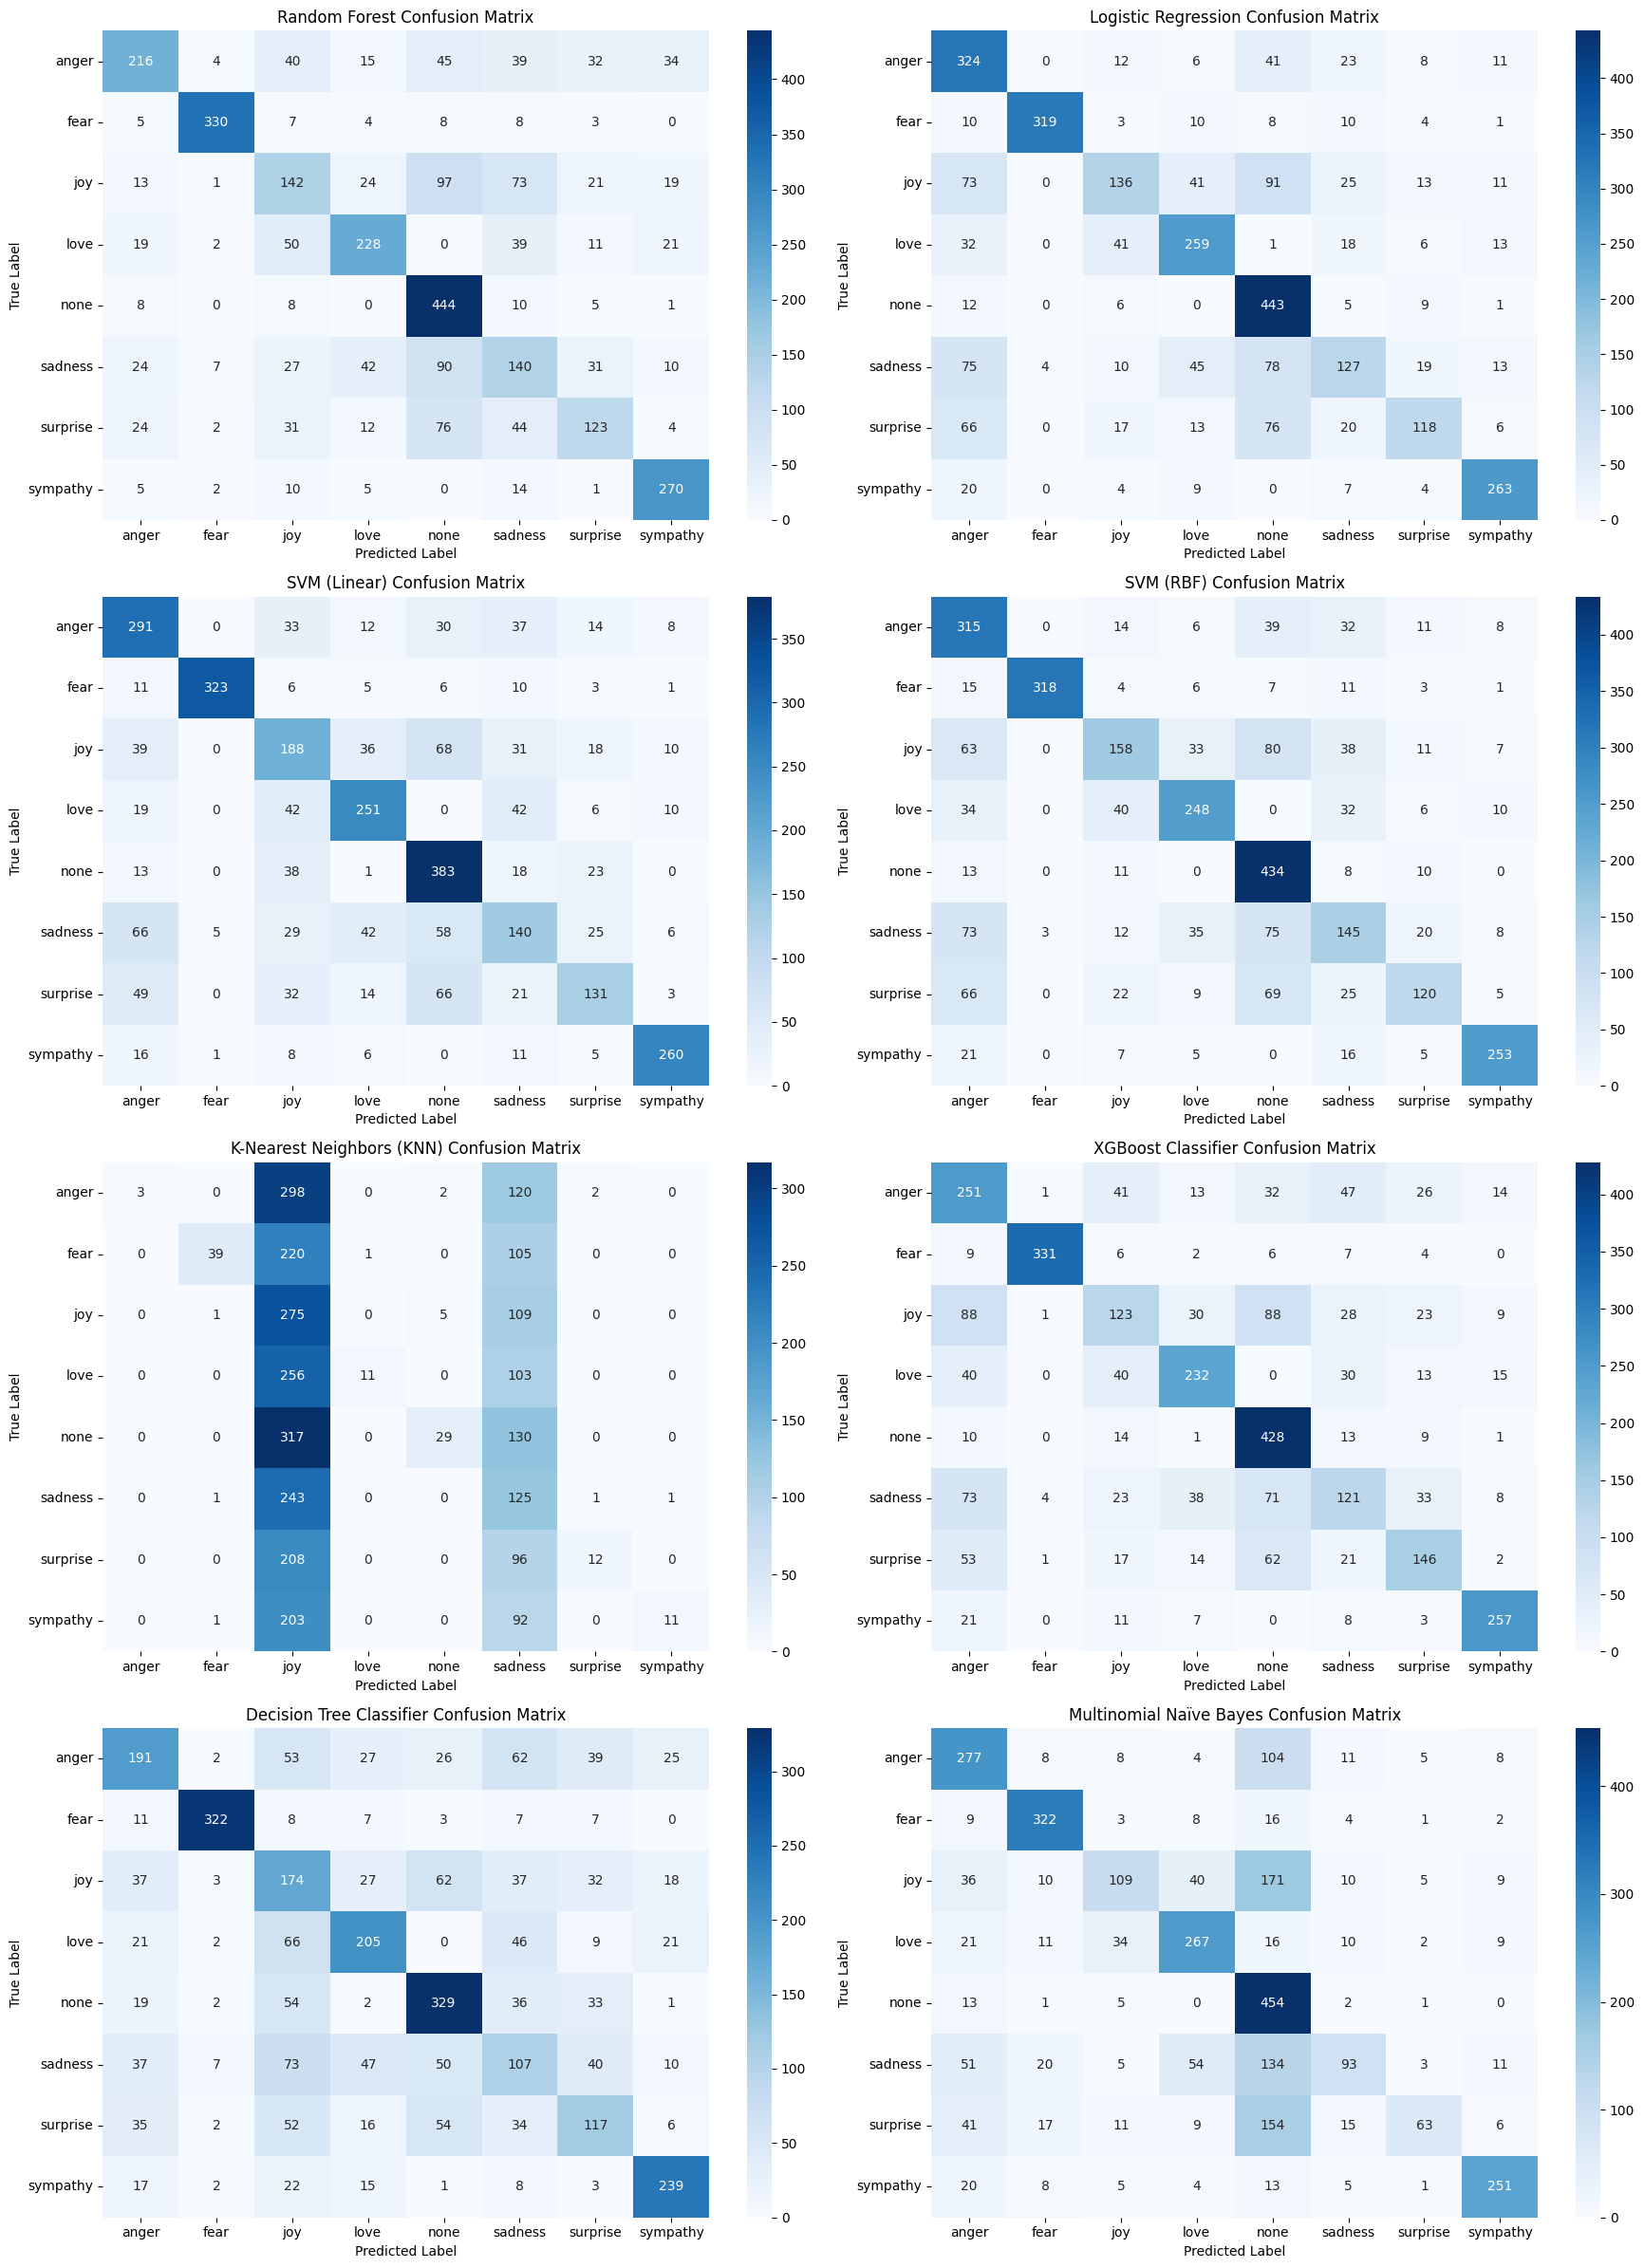

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to plot confusion matrix
def plot_confusion_matrix(cm, labels, title, ax):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

# 🔹 تجهيز التصنيفات الأصلية
class_labels = label_encoder.classes_  # التصنيفات الأصلية مثل ['joy', 'sadness', 'anger', ...]
num_classes = len(class_labels)

# 🔹 إنشاء شبكة الرسم
num_models = len(models)  # عدد النماذج
num_cols = 2  # عدد الأعمدة في الشبكة
num_rows = (num_models + 1) // num_cols  # عدد الصفوف المطلوبة
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 6))

# 🔹 تجهيز المحاور إذا كان هناك نموذج واحد فقط
if num_models == 1:
    axes = np.array([axes])

# 🔹 رسم مصفوفة الارتباك لكل نموذج
for i, (name, model) in enumerate(models.items()):
    # توقع التصنيفات
    y_pred_encoded = model.predict(x_test)  # القيم المتوقعة مشفرة
    y_test_encoded = label_encoder.transform(y_test)  # تحويل القيم الحقيقية إلى أرقام

    # إنشاء مصفوفة الارتباك
    cm = confusion_matrix(y_test_encoded, y_pred_encoded, labels=np.arange(num_classes))

    # رسم مصفوفة الارتباك في الشبكة
    plot_confusion_matrix(cm, labels=class_labels, title=f'{name} Confusion Matrix', ax=axes.flatten()[i])

# 🔹 إزالة المحاور الفارغة إذا كانت موجودة
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(axes.flatten()[j])

# 🔹 ضبط التخطيط النهائي وعرض المخططات
plt.tight_layout()
plt.show()


In [ ]:
# # #--- الخطوة 0: التأكد من تثبيت المكتبات ---
# !pip install transformers[torch] datasets evaluate accelerate -U
# !pip install arabic-reshaper pyarabic # إذا كنت تستخدمها للتنظيف الإضافي هنا
# !pip install emoji # إذا كنت تستخدمها للتنظيف الإضافي هنا


In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset, DatasetDict # مكتبة Hugging Face للبيانات
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
import evaluate # مكتبة Hugging Face للتقييم
import torch # أو tensorflow حسب الباكند
import math

# --- الخطوة 1: إعداد البيانات ---

# 1.1 تحميل أو استخدام الداتا فريم النهائية
# افترض أن 'df' هو الداتا فريم التي تحتوي على 'Clean_Text' و 'emotion'
# (بعد التنظيف والفلترة إذا كنت قد فعلت ذلك)
# مثال: df = pd.read_csv('filtered_data.csv') أو استخدم df_final من الكود السابق

# 1.2 ترميز التصنيفات (Labels)
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['emotion'])
num_labels = len(label_encoder.classes_)
class_labels = label_encoder.classes_ # للاحتفاظ بأسماء الفئات

# إنشاء قواميس للتحويل بين الأرقام والأسماء (مفيد لاحقًا)
id2label = {i: label for i, label in enumerate(class_labels)}
label2id = {label: i for i, label in enumerate(class_labels)}

print(f"Number of labels: {num_labels}")
print(f"Labels mapped: {label2id}")

# 1.3 تقسيم البيانات (Train, Validation, Test)
# نستخدم عمود label_encoded للـ stratify
train_df, test_df = train_test_split(
    df[['Clean_Text', 'label_encoded']],
    test_size=0.2, # 20% للاختبار
    stratify=df['label_encoded'],
    random_state=42
)

train_df, val_df = train_test_split(
    train_df,
    test_size=0.1, # 10% من بيانات التدريب الأصلية للتحقق (أي حوالي 8% من الكل)
    stratify=train_df['label_encoded'],
    random_state=42
)

print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

# 1.4 تحويل إلى صيغة datasets
train_dataset = Dataset.from_pandas(train_df.rename(columns={'Clean_Text': 'text', 'label_encoded': 'label'}))
val_dataset = Dataset.from_pandas(val_df.rename(columns={'Clean_Text': 'text', 'label_encoded': 'label'}))
test_dataset = Dataset.from_pandas(test_df.rename(columns={'Clean_Text': 'text', 'label_encoded': 'label'}))

# إنشاء DatasetDict
ds = DatasetDict({
    'train': train_dataset,
    'validation': val_dataset,
    'test': test_dataset
})

print("\nDataset structure:")
print(ds)

# --- الخطوة 2: التوكنزيشن ---
model_checkpoint = "aubmindlab/bert-base-arabertv2" # اسم النموذج من Hugging Face
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

def tokenize_data(batch):
    # قم بالتوكنزيشن لعمود 'text'
    # padding='max_length' يضيف padding حتى أقصى طول
    # truncation=True يقص النصوص الأطول من اللازم
    # max_length يمكن تعديله، 128 غالبًا ما يكون كافيًا للبداية
    return tokenizer(batch['text'], padding='max_length', truncation=True, max_length=128)

# تطبيق التوكنزيشن على جميع المجموعات
tokenized_ds = ds.map(tokenize_data, batched=True)

# إزالة العمود النصي الأصلي وتغيير اسم عمود التصنيف
tokenized_ds = tokenized_ds.remove_columns(['text', '__index_level_0__']) # إزالة العمود النصي وعمود الفهرس إن وجد
tokenized_ds = tokenized_ds.rename_column('label', 'labels')
tokenized_ds.set_format('torch') # أو 'tensorflow' إذا كنت تستخدم TensorFlow

print("\nTokenized dataset example (first training sample):")
print(tokenized_ds['train'][0])

# --- الخطوة 3: تحميل النموذج ---
model = AutoModelForSequenceClassification.from_pretrained(
    model_checkpoint,
    num_labels=num_labels, # عدد المشاعر التي تريد تصنيفها
    id2label=id2label,     # تمرير القواميس يساعد النموذج على فهم التصنيفات
    label2id=label2id
)

# التأكد من أن النموذج يعمل على الـ GPU إذا كانت متاحة
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"\nModel loaded on: {device}")

# --- الخطوة 4: إعداد مقاييس التقييم ---
accuracy_metric = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
    # حساب F1 score (weighted مناسب لعدم التوازن الطفيف)
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")["f1"]
    return {"accuracy": acc, "f1": f1}

# --- الخطوة 5: إعداد التدريب ---
# حساب عدد الخطوات لكل دورة لـ eval_steps و save_steps (لتجنب أخطاء الإصدارات القديمة)
train_batch_size = 16 # يجب أن يتطابق مع per_device_train_batch_size
eval_batch_size = 16 # يجب أن يتطابق مع per_device_eval_batch_size
epochs = 3 # ابدأ بـ 3-4 دورات

# تأكد من استخدام حجم مجموعة التدريب الصحيحة
steps_per_epoch = math.ceil(len(tokenized_ds["train"]) / train_batch_size)
logging_steps = max(1, steps_per_epoch // 5) # مثال: تسجيل 5 مرات في الدورة

print(f"\nCalculated steps per epoch: {steps_per_epoch}")
print(f"Logging steps: {logging_steps}")

Number of labels: 8
Labels mapped: {'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'none': 4, 'sadness': 5, 'surprise': 6, 'sympathy': 7}
Training set size: 7246
Validation set size: 806
Test set size: 2013

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 7246
    })
    validation: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 806
    })
    test: Dataset({
        features: ['text', 'label', '__index_level_0__'],
        num_rows: 2013
    })
})


tokenizer_config.json:   0%|          | 0.00/611 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/720k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/7246 [00:00<?, ? examples/s]

Map:   0%|          | 0/806 [00:00<?, ? examples/s]

Map:   0%|          | 0/2013 [00:00<?, ? examples/s]


Tokenized dataset example (first training sample):
{'labels': tensor(2), 'input_ids': tensor([   33, 26382, 11525, 40510,   220, 59518, 25874, 24850,  4198,   210,
         1793, 35497,  5179,   228,   437,  2252, 12043, 25302,  7214, 26921,
          221,    34,    31,    31,    31,    31,    31,    31,    31,    31,
           31,    31,    31,    31,    31,    31,    31,    31,    31,    31,
           31,    31,    31,    31,    31,    31,    31,    31,    31,    31,
           31,    31,    31,    31,    31,    31,    31,    31,    31,    31,
           31,    31,    31,    31,    31,    31,    31,    31,    31,    31,
           31,    31,    31,    31,    31,    31,    31,    31,    31,    31,
           31,    31,    31,    31,    31,    31,    31,    31,    31,    31,
           31,    31,    31,    31,    31,    31,    31,    31,    31,    31,
           31,    31,    31,    31,    31,    31,    31,    31,    31,    31,
           31,    31,    31,    31,    31,    31,    31

model.safetensors:   0%|          | 0.00/543M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmindlab/bert-base-arabertv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Model loaded on: cuda



Calculated steps per epoch: 453
Logging steps: 90


In [ ]:
!pip install transformers --upgrade

In [ ]:
training_args = TrainingArguments(
    output_dir="arabic_sentiment_bert_model",
    num_train_epochs=epochs,
    learning_rate=2e-5,
    per_device_train_batch_size=train_batch_size,
    per_device_eval_batch_size=eval_batch_size,
    weight_decay=0.01,
    # Set evaluation strategy to match save strategy
    eval_strategy="steps",  # Evaluate at the same frequency as saving
    eval_steps=steps_per_epoch,    # Evaluate every epoch
    # ... (rest of your training arguments) ...
    save_strategy="steps",         # Save every epoch
    save_steps=steps_per_epoch,    # Save every epoch
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    push_to_hub=False,
    report_to="none",
    fp16=torch.cuda.is_available(),
)

In [ ]:
# --- الخطوة 6: التدريب ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_ds["train"],
    eval_dataset=tokenized_ds["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

print("\n🚀 Starting Fine-tuning (this may take a while)...")
try:
    trainer.train()
    print("✅ Training finished successfully!")
except Exception as e:
    print(f"❌ An error occurred during training: {e}")

# --- الخطوة 7: التقييم النهائي ---
print("\n📈 Evaluating the best model on the Test Set...")
try:
    test_results = trainer.evaluate(tokenized_ds["test"])
    print(f"Test Set Evaluation Results: {test_results}")
except Exception as e:
    print(f"❌ An error occurred during evaluation: {e}")



<ipython-input-36-3fb844140ea2>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(



🚀 Starting Fine-tuning (this may take a while)...


Step,Training Loss,Validation Loss,Accuracy,F1
453,No log,0.951259,0.671216,0.660623
906,1.196400,0.956630,0.669975,0.661716
1359,0.786500,0.921895,0.688586,0.686291


✅ Training finished successfully!

📈 Evaluating the best model on the Test Set...


Test Set Evaluation Results: {'eval_loss': 0.8643897771835327, 'eval_accuracy': 0.7128663686040735, 'eval_f1': 0.7098923626795571, 'eval_runtime': 5.7419, 'eval_samples_per_second': 350.579, 'eval_steps_per_second': 21.944, 'epoch': 3.0}


In [ ]:
# --- افترض أن هذا الكود يأتي بعد انتهاء trainer_bert.train() ---

# --- 5. (موصى به) حفظ النموذج الأفضل والتوكنايزر بشكل صريح ---
# اسم المجلد يجب أن يطابق output_dir في TrainingArguments
bert_model_output_dir_final = "arabic_sentiment_bert_model" # <-- تأكد من تطابق هذا الاسم مع output_dir

print(f"\nSaving the best model explicitly to '{bert_model_output_dir_final}'...")
try:
    # trainer.model يحتوي الآن على أفضل نموذج بسبب load_best_model_at_end=True
    trainer.save_model(bert_model_output_dir_final)

    # حفظ التوكنايزر معه أمر ضروري
    if 'tokenizer' in locals(): # تأكد من أن كائن التوكنايزر لا يزال متاحًا
         tokenizer.save_pretrained(bert_model_output_dir_final)
         print(f"✅ Best model and tokenizer saved successfully to '{bert_model_output_dir_final}'.")
    else:
         print(f"✅ Best model saved to '{bert_model_output_dir_final}'.")
         print("⚠️ Warning: Tokenizer object ('tokenizer') not found in the current scope. "
               "Make sure to save it separately or ensure it's saved within the checkpoint "
               "if you need to reload the model later with its tokenizer.")

    # الآن المجلد 'arabic_sentiment_bert_model' جاهز للرفع أو الاستخدام

except Exception as e:
    print(f"❌ An error occurred during the explicit saving step: {e}")


Saving the best model explicitly to 'arabic_sentiment_bert_model'...
✅ Best model and tokenizer saved successfully to 'arabic_sentiment_bert_model'.


In [ ]:
# --- الخطوة 8: التنبؤ بنصوص جديدة (اختياري) ---
new_texts_llm = [
    "استيقظت هذا الصباح بشعور رائع، تناولت فطوري المفضل وذهبت في نزهة لطيفة تحت أشعة الشمس الدافئة. كان يومًا مليئًا بالطاقة الإيجابية والسعادة.",
    "منذ الصباح وكل شيء يسير بشكل خاطئ، تأخرت عن العمل، ثم فقدت بعض الأوراق المهمة، والآن أشعر وكأن هذا اليوم لن ينتهي أبدًا. إنه محبط جدًا.",
    "كنت أسير في طريق مظلم وحدي، وفجأة سمعت صوتًا غريبًا خلفي. شعرت بقشعريرة تسري في جسدي ولم أستطع حتى الالتفات. كان ذلك مرعبًا جدًا.",
    "بعد أيام من الانتظار، تلقيت اتصالًا يخبرني أنني حصلت على المنحة الدراسية التي كنت أحلم بها. لم أصدق أذنيّ من شدة المفاجأة والفرحة!",
    "بعد كل الجهد الذي بذلته في هذا المشروع، قرر المدير منح التقدير لشخص آخر. لا أستطيع وصف مدى الغضب الذي أشعر به الآن، هذا ليس عدلًا على الإطلاق!"
]

print("\n📝 Predicting on new texts using the fine-tuned BERT model...")
try:
    model.to(device) # التأكد من أن النموذج على الجهاز الصحيح
    inputs = tokenizer(new_texts_llm, return_tensors="pt", padding=True, truncation=True, max_length=128).to(device)

    with torch.no_grad():
        logits = model(**inputs).logits

    predictions = torch.argmax(logits, dim=-1).cpu().numpy()
    predicted_labels_llm = label_encoder.inverse_transform(predictions)

    for text, emotion in zip(new_texts_llm, predicted_labels_llm):
        print(f"🔹 النص: {text} \n→ المشاعر المتوقعة (BERT): {emotion}\n")

except Exception as e:
    print(f"❌ An error occurred during prediction: {e}")


📝 Predicting on new texts using the fine-tuned BERT model...
🔹 النص: استيقظت هذا الصباح بشعور رائع، تناولت فطوري المفضل وذهبت في نزهة لطيفة تحت أشعة الشمس الدافئة. كان يومًا مليئًا بالطاقة الإيجابية والسعادة. 
→ المشاعر المتوقعة (BERT): joy

🔹 النص: منذ الصباح وكل شيء يسير بشكل خاطئ، تأخرت عن العمل، ثم فقدت بعض الأوراق المهمة، والآن أشعر وكأن هذا اليوم لن ينتهي أبدًا. إنه محبط جدًا. 
→ المشاعر المتوقعة (BERT): sadness

🔹 النص: كنت أسير في طريق مظلم وحدي، وفجأة سمعت صوتًا غريبًا خلفي. شعرت بقشعريرة تسري في جسدي ولم أستطع حتى الالتفات. كان ذلك مرعبًا جدًا. 
→ المشاعر المتوقعة (BERT): sadness

🔹 النص: بعد أيام من الانتظار، تلقيت اتصالًا يخبرني أنني حصلت على المنحة الدراسية التي كنت أحلم بها. لم أصدق أذنيّ من شدة المفاجأة والفرحة! 
→ المشاعر المتوقعة (BERT): love

🔹 النص: بعد كل الجهد الذي بذلته في هذا المشروع، قرر المدير منح التقدير لشخص آخر. لا أستطيع وصف مدى الغضب الذي أشعر به الآن، هذا ليس عدلًا على الإطلاق! 
→ المشاعر المتوقعة (BERT): sadness

